In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [6]:
from torch.utils.data import Dataset, DataLoader

class SkipGramDataset(Dataset):
    def __init__(self, skip_gram, voc_size):
        self.skip_grams = skip_gram
        self.voc_size = voc_size

    def __len__(self):
        return len(self.skip_grams)
    
    def __getitem__(self, idx):
        target, context = self.skip_grams[idx]
        target_one_hot = np.eye(self.voc_size)[target]
        return torch.tensor(target_one_hot, dtype=torch.float32), torch.tensor(context, dtype=torch.long)

In [14]:
lr = 0.001
batch_size = 2
embedding_size = 25

In [9]:
sentences = [
    "apple banana fruit orange lemon mango pear cherry banana apple",
    "banana orange fruit pineapple watermelon mango orange banana kiwi grape",
    "dog cat animal lion tiger elephant monkey cat dog zebra deer",
    "cat monkey animal lion hippo tiger wolf fox bear rabbit",
    "monkey dog animal lion crocodile tiger turtle parrot eagle owl",
    "car truck vehicle bike motorcycle bus train airplane ship truck",
    "python java programming coding algorithm data structure machine learning python",
    "sun moon earth planet galaxy universe planet asteroid star moon",
    "doctor patient hospital nurse medicine surgery pharmacy doctor treatment therapy",
    "mountain river ocean desert forest valley river mountain waterfall canyon"
]

In [10]:
word_sequences = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
voc_size = len(word_list)

word_dict = {w: i for i, w in enumerate(word_list)}

In [13]:
skip_grams = []
for i in range(1, len(word_sequences) - 1):
    target = word_dict[word_sequences[i]]
    context = [word_dict[word_sequences[i - 1]], word_dict[word_sequences[i + 1]]]
    for w in context:
        skip_grams.append([target, w])

dataset = SkipGramDataset(skip_grams, voc_size)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [15]:
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        self.encoding = nn.Sequential(
            nn.Linear(voc_size, embedding_size, bias=False),
            nn.Linear(embedding_size, voc_size, bias=False)
        )

    def forward(self, X):
        return self.encoding(X)
    
model = Word2Vec()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr)

In [17]:
max_epochs = 2000
loss_after_epoch = []
for epoch in range(max_epochs):
    model.train()
    avg_loss = 0.0
    for input_batch, target_batch in data_loader:
        optimizer.zero_grad()

        yhat = model(input_batch)
        loss = loss_fn(yhat, target_batch)

        avg_loss += loss.item()

        loss.backward()
        optimizer.step()
    avg_loss /= len(data_loader)
    loss_after_epoch.append(avg_loss)

    if((epoch + 1) % 50 == 0):
        print(f"Epoch {epoch + 1}, Loss: {loss.item():.6f}")

Epoch 50, Loss: 1.705858
Epoch 100, Loss: 0.862354
Epoch 150, Loss: 1.136713
Epoch 200, Loss: 0.763112
Epoch 250, Loss: 1.367422
Epoch 300, Loss: 1.160974
Epoch 350, Loss: 0.985659
Epoch 400, Loss: 1.319547
Epoch 450, Loss: 1.172830
Epoch 500, Loss: 0.821045
Epoch 550, Loss: 1.169585
Epoch 600, Loss: 0.929544
Epoch 650, Loss: 0.832082
Epoch 700, Loss: 1.397049
Epoch 750, Loss: 0.814494
Epoch 800, Loss: 1.938631
Epoch 850, Loss: 0.999589
Epoch 900, Loss: 0.958744
Epoch 950, Loss: 1.368500
Epoch 1000, Loss: 1.141733
Epoch 1050, Loss: 0.862295
Epoch 1100, Loss: 0.763290
Epoch 1150, Loss: 1.199604
Epoch 1200, Loss: 1.278880
Epoch 1250, Loss: 0.981728
Epoch 1300, Loss: 1.204401
Epoch 1350, Loss: 0.910407
Epoch 1400, Loss: 0.802931
Epoch 1450, Loss: 1.156877
Epoch 1500, Loss: 0.756709
Epoch 1550, Loss: 0.948832
Epoch 1600, Loss: 1.158357
Epoch 1650, Loss: 0.610388
Epoch 1700, Loss: 0.954892
Epoch 1750, Loss: 0.835296
Epoch 1800, Loss: 0.750849
Epoch 1850, Loss: 1.374096
Epoch 1900, Loss: 1.1

Text(0.5, 1.0, 'Loss at Epoch')

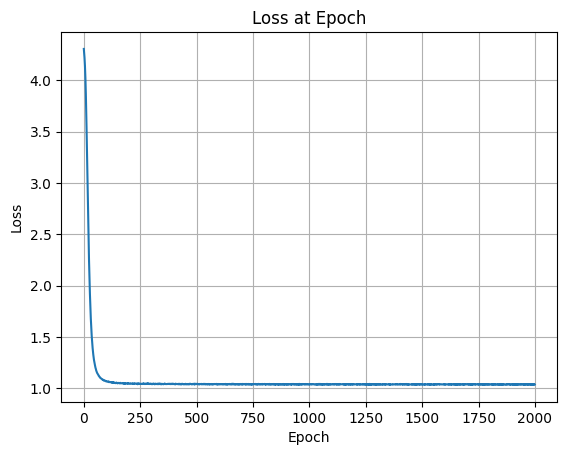

In [18]:
import matplotlib.pyplot as plt

plt.plot(loss_after_epoch)
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss at Epoch")